In [1]:
# %load /Users/facaiyan/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['axes.grid'] = False

import numpy as np

#from IPython.display import SVG
def show_image(filename, figsize=None, res_dir=True):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))

Chapter 6 Deep Feedforward Networks
===================================

feedforward: no feedback connections.

input layer -> hidden layers -> output layer

\begin{align}
    y &= f(x; \theta) \approx f^*(x) \\
      &= W^T \phi(x) + b
\end{align}

how to choose the mapping $\phi$?

+ use a very generic $\phi$, such as RBF kernel $\implies$ generation remains poor. 
+ manually engineer $\phi$ $\implies$ classical feature engineer.
+ learn $\phi$ by deep learning. $y = f(x; \theta, w) = \phi(x; \theta)^T w$.
  - advantage: only needs to find the right general function family *VS* find the right function.

### 6.1 Example: Learning XOR

$h = g(W^T x + c)$, where an affine transformation followed by an activation function $g$.

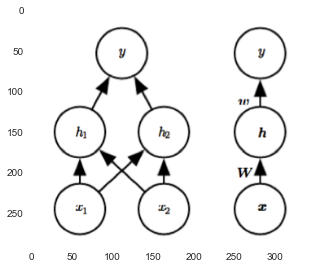

In [2]:
show_image("fig6_2.png", figsize=(5, 8))

default activation function is rectified linear unit (ReLU): $g(z) = max\{0, z\}$
+ advantage:
  1. piecewise linear function: very close to linear.
  2. easy to optimize with gradient-base methods.

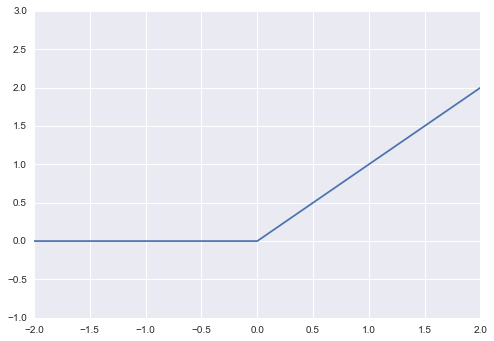

In [10]:
relu = lambda x: np.maximum(0, x)

x = np.linspace(-2, 2, 1000)
y =  relu(x)

plt.ylim([-1, 3])
plt.grid(True)
plt.plot(x, y)

### 6.2 Gradient-Based Learning

important:

+ initialize all weights to small random values.
+ initialize biases to zero or small positive values (push result to right area of ReLU).


#### 6.2.1 Cost Functions

In most cases, 

+ our parametric model defines a distribution $p(y | x; \theta)$,
+ simply use the priciple of maximum likelihood.

$\implies$ [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) as the cost function.


##### 6.2.1.1 Learning Conditional Distributions with Maximum Likelihood

maximum likelihdood in neural networks => cost function is simply the negative log-likelihood == cross-entropy.

\begin{equation}
    J(\theta) = - \mathbb{E}_{x, y \sim \hat{p}_{data}} \log p_{model}(y | x)
\end{equation}

advantage:

+ Specifying a model p(y | x) automatically determines a cost function log p(y | x). => removes the burden of designing cost functions for each model.
+ Undo the exp of some output units => avoid staturate problem (flat area, very small gradient).

unusual property of the cross-entropy cose: does not have a minimum value (negative infinity). => regularization.


##### 6.2.1.2 Learning Conditional Statistics

cost L2: learn mean of y when x is given.

cost L1: learn median of y when x is given.

#### 6.2.2 Output Units

##### 6.2.2.1 Linear Units for Gaussian Output Distributions

Linear output layers are often used to produce the mean of a conditional Gaussian distribution.

这里意思是说，给定$x$，它对应的样本集$y$应是高斯分布。而用线性模型来学习，预测的正是样本集均值$f(x) = \bar{y}$。可见，这种情况常见于回归问题。


##### 6.2.2.2 Sigmoid Units for Bernoulli Output Distributions

binary classification



